In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [3]:
df.shape

(400, 3)

In [4]:
df.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [5]:
df.duplicated().sum()

np.int64(33)

In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


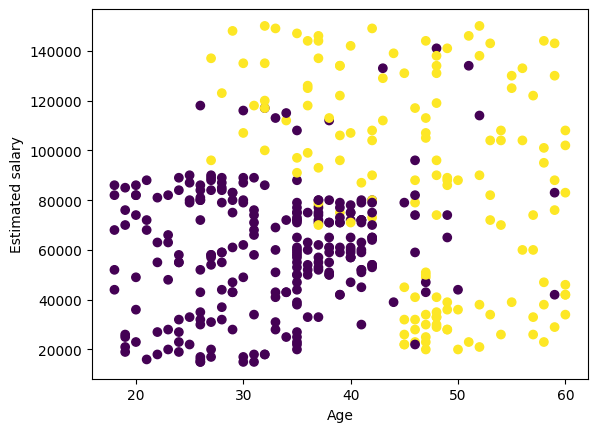

In [7]:
plt.scatter(df['Age'],df['EstimatedSalary'],c=df['Purchased'])
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.show()

In [8]:
X=df.iloc[:,[0,1]].values
y=df['Purchased'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.33, random_state=42)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((268, 2), (132, 2), (268,), (132,))

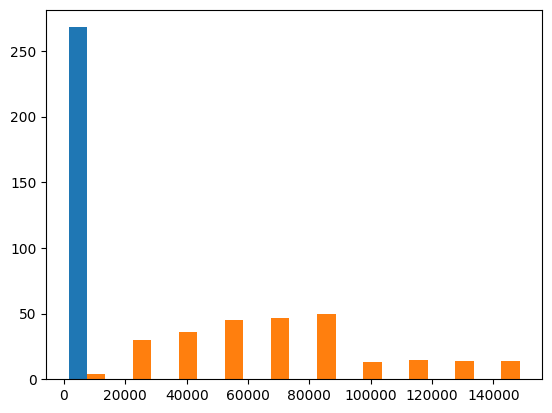

In [11]:
import matplotlib.pyplot as plt
plt.hist(X_train)
plt.show()

<Figure size 1000x1000 with 0 Axes>

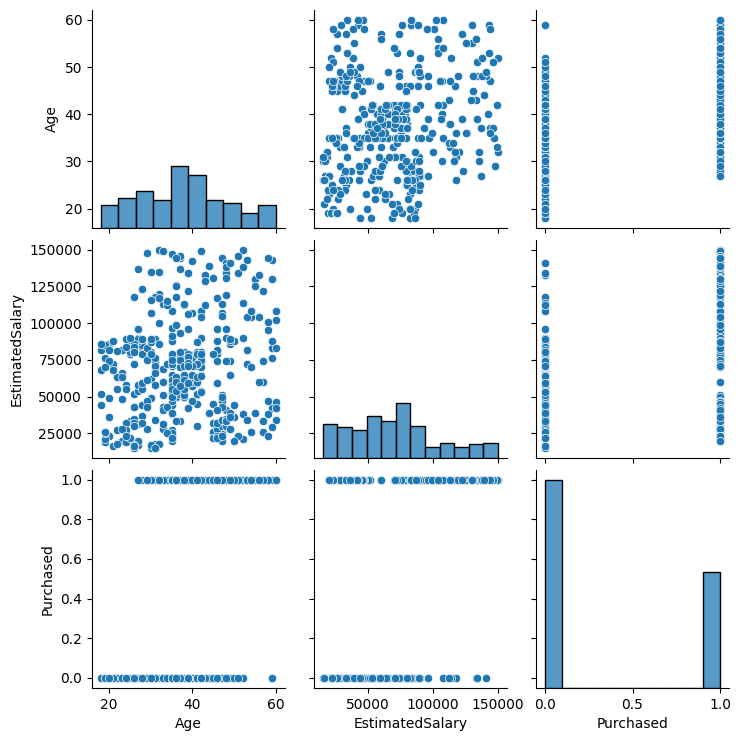

In [30]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.pairplot(df)

plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train_sc,y_train)
y_predict_dt=dt.predict(X_test_sc)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f"accuracy score of decision tree is {accuracy_score(y_test,y_predict_dt)}")

accuracy score of decision tree is 0.8560606060606061


In [15]:
print(f"Confusion of decision tree is {confusion_matrix(y_test,y_predict_dt)}")

Confusion of decision tree is [[71  9]
 [10 42]]


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_sc,y_train)
y_predict_rf=rf.predict(X_test_sc)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f"accuracy score of Random Forest is {accuracy_score(y_test,y_predict_rf)}")

accuracy score of Random Forest is 0.9090909090909091


In [18]:
print(f"Confusion of Random Forest is {confusion_matrix(y_test,y_predict_rf)}")

Confusion of Random Forest is [[74  6]
 [ 6 46]]


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train_sc,y_train)
y_predict_gnb=gnb.predict(X_test_sc)

In [20]:

print(f"accuracy score of GaussianNB is {accuracy_score(y_test,y_predict_gnb)}")

accuracy score of GaussianNB is 0.8939393939393939


In [31]:
print(f"Confusion of GNB is {confusion_matrix(y_test,y_predict_gnb)}")

Confusion of GNB is [[79  1]
 [13 39]]


In [22]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train_sc,y_train)
y_predict_sv=sv.predict(X_test_sc)

In [25]:
print(f"accuracy score of Support Vector Classifier is {accuracy_score(y_test,y_predict_sv)}")

accuracy score of Support Vector Classifier is 0.946969696969697


In [27]:
print(f"Confusion of SVC is {confusion_matrix(y_test,y_predict_sv)}")

Confusion of SVC is [[75  5]
 [ 2 50]]


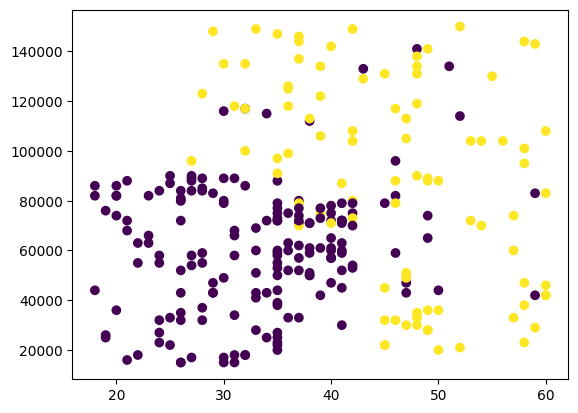

In [23]:
x=X_train[:,0]
y=X_train[:,1]
c=y_train
plt.scatter(x,y,c=c)
plt.show()

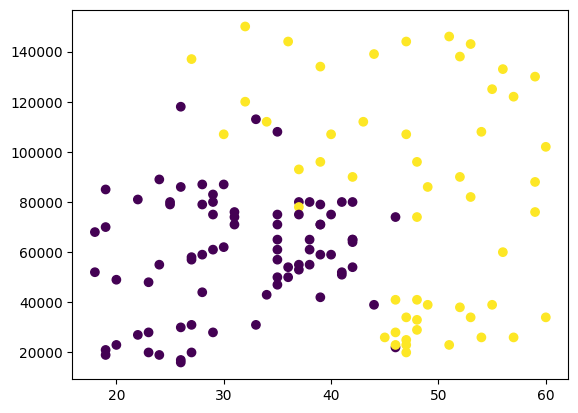

In [24]:

x=X_test[:,0]
y=X_test[:,1]
c=y_test
plt.scatter(x,y,c=c)
plt.show()

**##Conclusion**
in this dataset the accuracy of
(1) **Support Vector Classifier**(0.94)
(2) **Random Forest Classifier**(0.93)
(3) **Naive Bayes**(0.89)
(4) **Decision Tree**(0.85)

svc>rf>gnb>dt